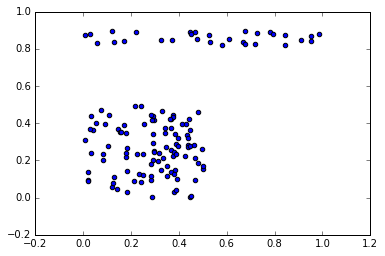

[21.898904199213032, 79.132000105607148, 7.944351938292634, 21.024743756887187]
[26.012086043866923, 87.966183482280556, 11.854819030129631, 4.1669114437229346]
[27.166416109215948, 89.43222865895217, 12.494418002370757, 0.90693722946109434]
[28.032985224909755, 88.79689400773087, 12.959620118742153, 0.21050064861719417]
[28.952578998107484, 87.557272326470752, 13.438292906085394, 0.051855769336438241]
[29.858149880377706, 86.224760970652738, 13.903604470848075, 0.013484678121505807]
[30.704509677581942, 84.955408573643709, 14.336401774062765, 0.0036799747116162498]
[31.476814181609608, 83.791386874191971, 14.730750755956294, 0.0010481882421497844]
[32.174993366246319, 82.737467080646667, 15.087229426879986, 0.00031012622708014216]
[32.804654576216748, 81.786363904098664, 15.408886601642122, 9.4918042506433122e-05]
[0.3478799330186515, 0.34006308772956717, 0.34743248597318344, 0.35045734263573414] [0.40349576974397916, 0.39241320239952904, 0.40337377457299795, 0.40736194388285663]


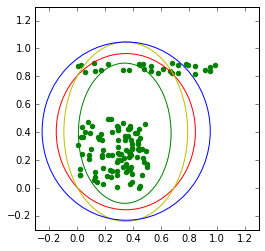

[0.3478799330186515, 0.34006308772956717, 0.34743248597318344, 0.35045734263573414] [0.40349576974397916, 0.39241320239952904, 0.40337377457299795, 0.40736194388285663]


In [21]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

#data1=[]
#for i in range(100):
#	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(30):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data2+data3#+data1



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assignx = []
assigny = []

for k in range(4):
	assignx=assignx+[random.random()]

for k in range(4):
	assigny=assigny+[random.random()]



sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assignx=[[],[],[],[]]
update_assigny=[[],[],[],[]]




vx=[random.random(),random.random(),random.random(),random.random()]
vy=[random.random(),random.random(),random.random(),random.random()]

p=[random.random(),random.random(),random.random(),random.random()]
rsum=[[],[],[],[]]
turn = 0
while turn<10:
	turn = turn+1
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))
		sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*vx[k])-(assigny[k]-datay[n])**2/(2*vy[k]))/s
			#print a,j,n,r[j][n]

	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
		rsum[k]=rs
			
		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*datax[n]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*datay[n]/float(rsum[k])
			update_assignx[k]=ua[0]
			update_assigny[k]=ua[1]
			
			
	assignx= update_assignx
	assigny= update_assigny

	for k in range(4):
		for n in range(len(data)):
			vx[k]=vx[k]+r[k][n]*(datax[n]-assignx[k])**2/float(rsum[k])
			vy[k]=vy[k]+r[k][n]*(datay[n]-assigny[k])**2/float(rsum[k])
		
	print rsum
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	

print assignx, assigny

c=[[],[],[],[]]

for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]

ell0= Ellipse(xy=[assignx[0],assigny[0]],width=np.sqrt(vx[0]),height=np.sqrt(vy[0]),color='r',fill=False)
ell1= Ellipse(xy=[assignx[1],assigny[1]],width=np.sqrt(vx[1]),height=np.sqrt(vy[1]),color='g',fill=False)
ell2= Ellipse(xy=[assignx[2],assigny[2]],width=np.sqrt(vx[2]),height=np.sqrt(vy[2]),color='y',fill=False)
ell3= Ellipse(xy=[assignx[3],assigny[3]],width=np.sqrt(vx[3]),height=np.sqrt(vy[3]),color='b',fill=False)

fig=plt.figure(0) 
ax=fig.add_subplot(111, aspect='equal')
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
ax.add_artist(ell0)
ax.add_artist(ell1)
ax.add_artist(ell2)
ax.add_artist(ell3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

print assignx, assigny
	


	

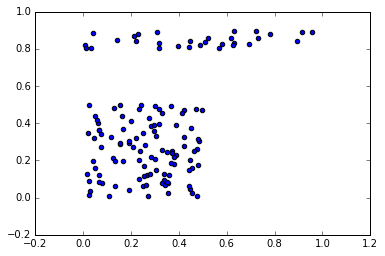

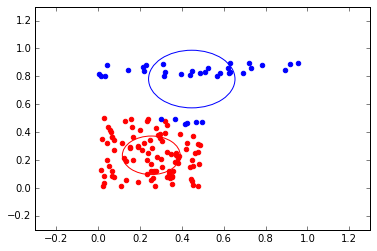

0.138173693885 0.000280920654126 1.96261557335e-17 0.206507473625
0.0192882547628 nan nan 0.0675261626156


In [148]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(30):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data2+data3#+data1

datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]

plt.scatter(datax,datay)
plt.show()


	
assign = []
for j in range(4):
	assign=assign+[[random.random(),random.random()]]




sum=[]
for i in range(len(data)):
	sum=sum+[[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assign=[]
for k in range(4):
	update_assign=update_assign+[[]]	

I = 2 # dimension

v=[] # variance or 1/beta	
for k in range(4):
	v=v+[np.var(data)]

p=[]
for k in range(4):
	p=p+[1]
rsum=[[],[],[],[]]
shrink = False
while not shrink:
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))
			sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(np.sqrt(2*np.pi*v[k]))**I*np.exp(-1/v[k]*(LA.norm(np.array(assign[k])-np.array(data[n]))))/s
			#print a,j,n,r[j][n]

	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
			rsum[k]=rs
			

		ua=[0,0]
		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*data[n][0]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*data[n][1]/float(rsum[k])
			update_assign[k]=ua
			
	assign= update_assign
	v=[0,0,0,0]
	for k in range(4):
		for n in range(len(data)):
			v[k]=v[k]+r[k][n]*LA.norm(np.array(data[n])-np.array(assign[k]))**2/float(I*rsum[k])
		if v[k] < 0.00000001:
			shrink = True
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	


c=[[],[],[],[]]
for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]


circle0= plt.Circle(assign[0],np.sqrt(v[0]),color='r',fill=False)
circle1= plt.Circle(assign[1],np.sqrt(v[1]),color='g',fill=False)
circle2= plt.Circle(assign[2],np.sqrt(v[2]),color='y',fill=False)
circle3= plt.Circle(assign[3],np.sqrt(v[3]),color='b',fill=False)

fig, ax=plt.subplots()
plt.xlim([-.3,1.3])
plt.ylim([-.3,1.3])
ax.add_artist(circle0)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

ax.scatter([x for x,y in c[0]],[y for x,y in c[0]],color='r')
ax.scatter([x for x,y in c[1]],[y for x,y in c[1]],color='g')
ax.scatter([x for x,y in c[2]],[y for x,y in c[2]],color='y')
ax.scatter([x for x,y in c[3]],[y for x,y in c[3]],color='b')


plt.show()

print np.sqrt(v[0]),np.sqrt(v[1]),np.sqrt(v[2]),np.sqrt(v[3])
print np.var(c[0]),np.var(c[1]),np.var(c[2]),np.var(c[3])

	


	

In [19]:
v

[0.039273813535920021, 2.2236483340438421e-10, nan, 0.024458712514676729]

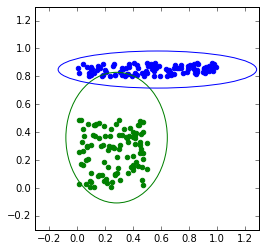

In [131]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

#data1=[]
#for i in range(100):
#	data1=data1+[[0.5+0.5*random.random(),0.5+0.5*random.random()]]
	
data2=[]
for i in range(100):
	data2=data2+[[0.5*random.random(),0.5*random.random()]]

data3 =[]
for i in range(100):
	data3=data3+[[random.random(),0.8+0.1*random.random()]]

data=data3+data2#+data1



datax=[]
for i in range(len(data)):
	datax=datax+[data[i][0]]
	
datay=[]
for i in range(len(data)):
	datay=datay+[data[i][1]]


	
assignx = []
assigny = []

for k in range(4):
	assignx=assignx+[random.random()]

for k in range(4):
	assigny=assigny+[random.random()]



sum=[[],[],[],[]]
r=[]	
for i in range(4):
	r=r+[[]]
	for j in range(len(data)):
		r[i]=r[i]+[[]]
update_assignx=[[],[],[],[]]
update_assigny=[[],[],[],[]]



vx, vy = [0.2,0.2,0.2,0.2], [0.2,0.2,0.2,0.2]
p=[0.5,0.5,0.5,0.5]


rsum=[[],[],[],[]]


turns = 0
shrink = False
while turns < 100 and not shrink :
	T = 0.04
	if turns > 500:
		T = 1
	sum=[]
	for n in range(len(data)):
		sum=sum+[[]]
	for n in range(len(data)):
		s=0
		for k in range(4):
			s=s+p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*T*vx[k])-(assigny[k]-datay[n])**2/(2*T*vy[k]))
			sum[n]=s
		for k in range(4):
			r[k][n]=p[k]/(2*np.pi*np.sqrt(vx[k]*vy[k]))*np.exp(-(assignx[k]-datax[n])**2/(2*T*vx[k])-(assigny[k]-datay[n])**2/(2*T*vy[k]))/s
	for k in range(4):
		rs=0
		for n in range(len(data)):
			rs=rs+r[k][n]
		rsum[k]=rs
			
		ua=[0,0]

		for n in range(len(data)):
			ua[0]=ua[0]+r[k][n]*datax[n]/float(rsum[k])
			ua[1]=ua[1]+r[k][n]*datay[n]/float(rsum[k])
		update_assignx[k]=ua[0]
		update_assigny[k]=ua[1]
			
			
	assignx= update_assignx
	assigny= update_assigny
	for k in range(4):
 		 for n in range(len(data)):
			vx[k]=vx[k]+r[k][n]*(datax[n]-assignx[k])**2/float(rsum[k])
			vy[k]=vy[k]+r[k][n]*(datay[n]-assigny[k])**2/float(rsum[k])

    
	rsumsum=0
	for k in range(4):
		rsumsum=rsumsum+rsum[k]
	
	p[k]=rsum[k]/float(rsumsum)	
	turns += 1

c=[[],[],[],[]]

for n in range(len(data)):
	a=[]
	for k in range(4):
		a=a+[r[k][n]]
	i=a.index(max(a))
	c[i]=c[i]+[data[n]]
ell =[]

colors = ['r','g','b','y']

for i in range(4):
	if c[i] != []:
		ell.append(Ellipse(xy=[assignx[i],assigny[i]],width=np.sqrt(vx[i]/4),height=np.sqrt(vy[i]/4),color=colors[i],fill=False))
        

fig=plt.figure(0) 
ax=fig.add_subplot(111, aspect='equal')
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
for i in range(len(ell)):
	ax.add_artist(ell[i])

for i in range(4):
	ax.scatter([x for x,y in c[i]],[y for x,y in c[i]],color=colors[i])

plt.show()



